In [1]:
import sys
sys.path.append("../../")
from didgelab.analysis import visualize_individuals, get_latest_population

In [3]:
infile = '../../../saved_evolutions/2024-04-20T08-40-53_evolve_arusha/population.json.gz'
population = get_latest_population(infile)
visualize_individuals(population["population"], n=10, base_freq=456)

EOFError: Compressed file ended before the end-of-stream marker was reached

In [ ]:
infile = '../../../saved_evolutions/2024-04-20T11-50-54_evolve_tamaki3/population.json.gz'
population = get_latest_population(infile)
visualize_individuals(population, n=10, base_freq=456)

In [ ]:
import json
import sys
import os
import gzip 

sys.path.append("../../")

from didgelab.calc.geo import Geo, geotools

import didgelab.calc.fft
from didgelab.calc.sim.sim import *
from didgelab.calc.fft import *
from didgelab.calc.conv import *
from didgelab.util.didge_visualizer import vis_didge


In [11]:
infile = '../../../saved_evolutions/2024-04-20T11-50-54_evolve_tamaki3/population.json.gz'
for line in gzip.open(infile):
    continue

json.loads(line)


{'generation': 599,
 'population': [{'genome': [0.0,
    1.0,
    0.20397326761158396,
    0.9767888347616731,
    0.4035360335847732,
    0.0,
    0.0,
    0.8941375754444975,
    0.0,
    0.25619601965199285,
    0.0,
    0.9629941901083278,
    0.0,
    0.5685694408045485,
    0.0,
    0.5438346381602971,
    0.476916308094579,
    0.31246966347486355,
    0.34276809879193876,
    0.0,
    0.8650129249587266,
    0.5461817035020304,
    0.5672446207058428,
    0.390936148780427,
    0.8012259377613988,
    0.0,
    1.0,
    0.7649166125546311,
    0.8541553727545013,
    1.0,
    1.0],
   'loss': {'fundamental_loss': 0.13794595440712598,
    'tuning_loss': 0.6925810379884567,
    'imp_loss': 1.526932407088471,
    'wobble_freq_loss': 5.755998601555312,
    'wobble_vol_loss': 0.2889760295752919,
    'total': 8.402434030614657},
   'representation': {'geo': [[0.0, 32.0],
     [81.33333333333333, 25.940244863181842],
     [218.43216968444656, 26.7406583161857],
     [294.24784078607973

In [6]:
def get_latest_population(indir):
    files = filter(lambda x:x[0:10] == "population", os.listdir(indir))
    files = [x[10:x.find(".")] for x in files]
    files = filter(lambda x:x.isnumeric(), files)
    files = sorted([int(x) for x in files])
    file = f"population{files[-1]}.json"
    return json.load(open(os.path.join(indir, file)))

def eval_individual(individual, base_freq=440):
    geo = individual["representation"]["geo"]
    geo = Geo(geo)
    vis_didge(geo)
    results = quick_analysis(geo, base_freq=base_freq)
    print(results["notes"].round(2))
    print(f"Impedance sum: {results['notes'].impedance.sum():.2f}")
    print(f"Volume: {geo.compute_volume()/1000:.2f} cm3")
    print(f"Length: {geo.geo[-1][0]/10:.2f} cm")
    print(f"Bell diameter: {geo.geo[-1][1]/10:.2f} cm")
    return results, geo

indir = "../../../saved_evolutions/2024-04-13T15-27-39_evolve_arusha"
population = get_latest_population(indir)
#_ = eval_individual(population[0], base_freq=456)


************************
Individual 0
************************


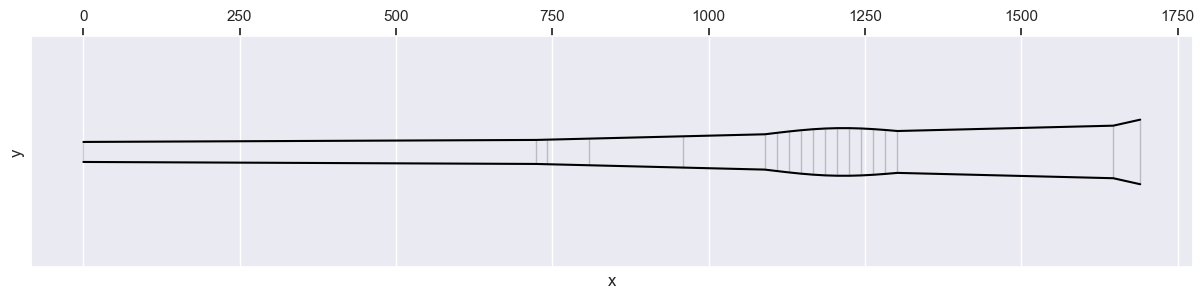

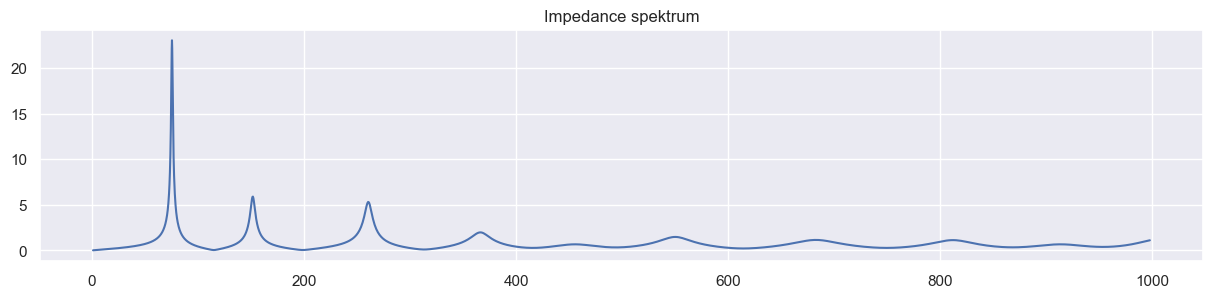

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1     -14.47      -31   75.45      23.06     1.00
1        D2      -4.47      -19  151.78       5.91     0.26
2        B3      30.53      -10  260.47       5.32     0.23
3        F3      20.53       -4  366.25       1.98     0.09
4        A4       0.53        0  456.14       0.67     0.03
5        C4      25.53        3  550.34       1.48     0.06
6        E4       0.53        7  683.44       1.15     0.05
7        G4       0.53       10  812.75       1.13     0.05
8        A5       0.53       12  912.28       0.67     0.03
Impedance sum: 41.36
Volume: 94.76 cm3
Length: 168.99 cm
Bell diameter: 10.33 cm

************************
Individual 1
************************


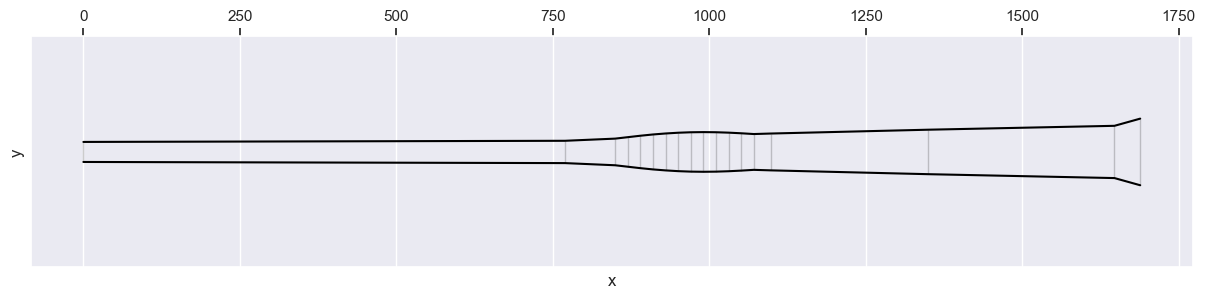

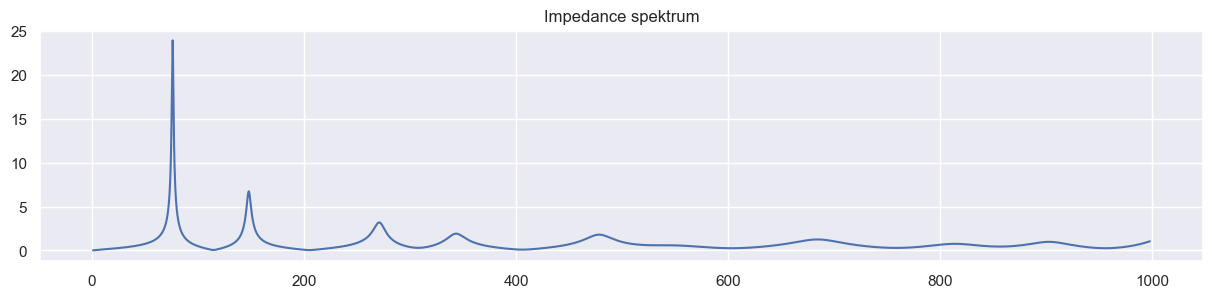

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1       0.53      -31   76.11      23.98     1.00
1        D2     -49.47      -19  147.89       6.74     0.28
2        C3       0.53       -9  271.22       3.19     0.13
3        E3      10.53       -5  343.70       1.91     0.08
4       A#4     -19.47        1  477.71       1.80     0.07
5        C4      -4.47        3  540.88       0.59     0.02
6        E4       0.53        7  683.44       1.25     0.05
7        G4       5.53       10  815.10       0.75     0.03
8        A5     -19.47       12  901.80       0.98     0.04
Impedance sum: 41.19
Volume: 92.48 cm3
Length: 168.85 cm
Bell diameter: 10.64 cm

************************
Individual 2
************************


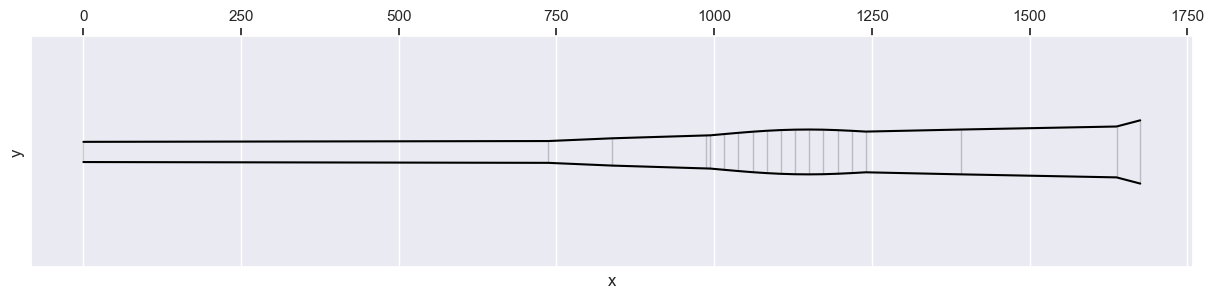

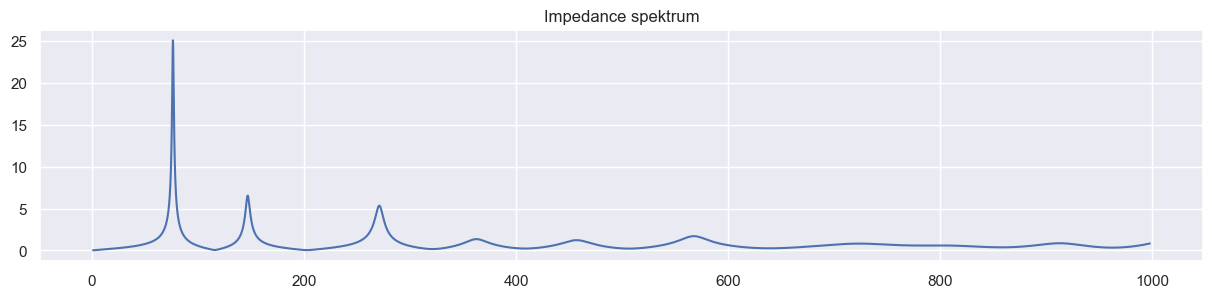

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1       5.53      -31   76.33      25.13     1.00
1       C#2      40.53      -20  147.03       6.55     0.26
2        C3       0.53       -9  271.22       5.36     0.21
3        F3       0.53       -4  362.04       1.35     0.05
4        A4       5.53        0  457.46       1.23     0.05
5       C#4     -19.47        4  568.10       1.70     0.07
6        F4       0.53        8  724.08       0.81     0.03
7        G4     -24.47       10  801.10       0.59     0.02
8        A5       0.53       12  912.28       0.86     0.03
Impedance sum: 43.58
Volume: 88.76 cm3
Length: 167.55 cm
Bell diameter: 10.03 cm

************************
Individual 3
************************


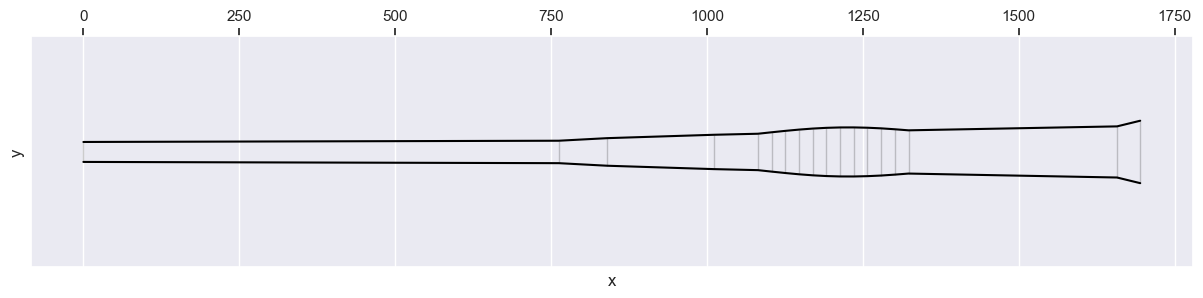

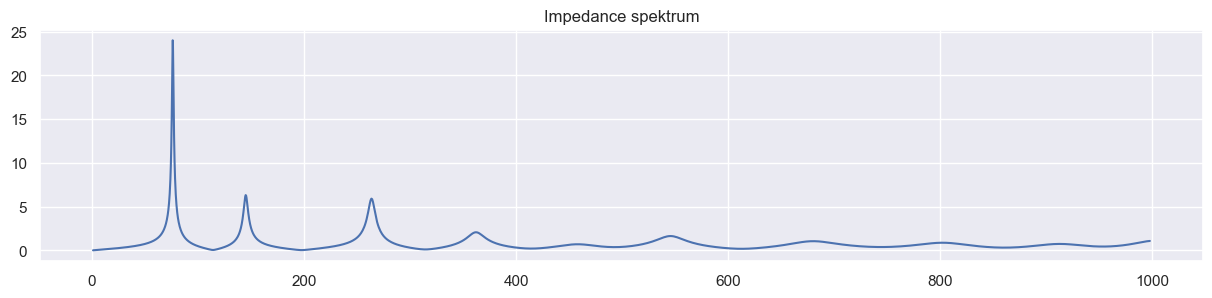

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1       0.53      -31   76.11      24.01     1.00
1       C#2      15.53      -20  144.93       6.32     0.26
2        C3     -49.47       -9  263.50       5.92     0.25
3        F3       0.53       -4  362.04       2.07     0.09
4        A4       5.53        0  457.46       0.70     0.03
5        C4      10.53        3  545.59       1.64     0.07
6        E4      -9.47        7  679.50       1.05     0.04
7        G4     -19.47       10  803.41       0.88     0.04
8        A5       0.53       12  912.28       0.74     0.03
Impedance sum: 43.33
Volume: 93.27 cm3
Length: 169.48 cm
Bell diameter: 10.01 cm

************************
Individual 4
************************


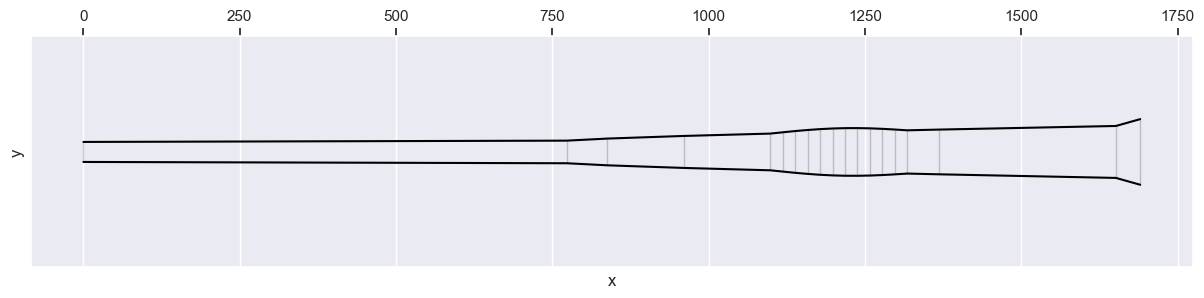

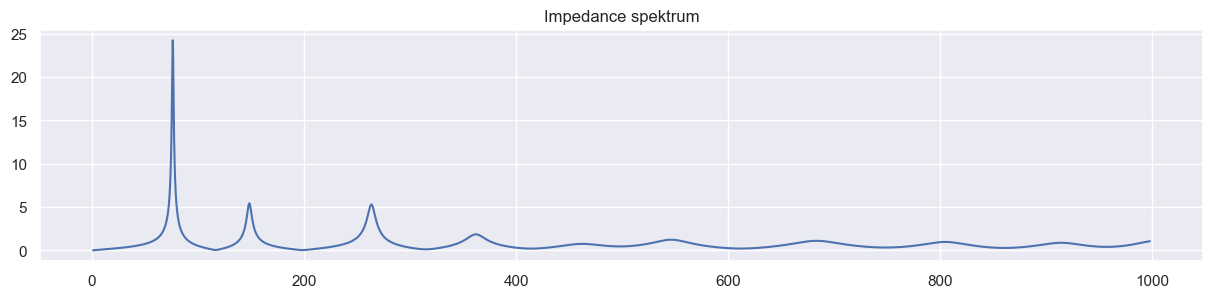

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1       0.53      -31   76.11      24.24     1.00
1        D2     -44.47      -19  148.31       5.44     0.22
2        C3     -49.47       -9  263.50       5.31     0.22
3        F3       0.53       -4  362.04       1.85     0.08
4        A4      25.53        0  462.77       0.76     0.03
5        C4      10.53        3  545.59       1.23     0.05
6        E4       0.53        7  683.44       1.11     0.05
7        G4     -14.47       10  805.74       0.98     0.04
8        A5       5.53       12  914.92       0.88     0.04
Impedance sum: 41.80
Volume: 92.06 cm3
Length: 169.00 cm
Bell diameter: 10.49 cm

************************
Individual 5
************************


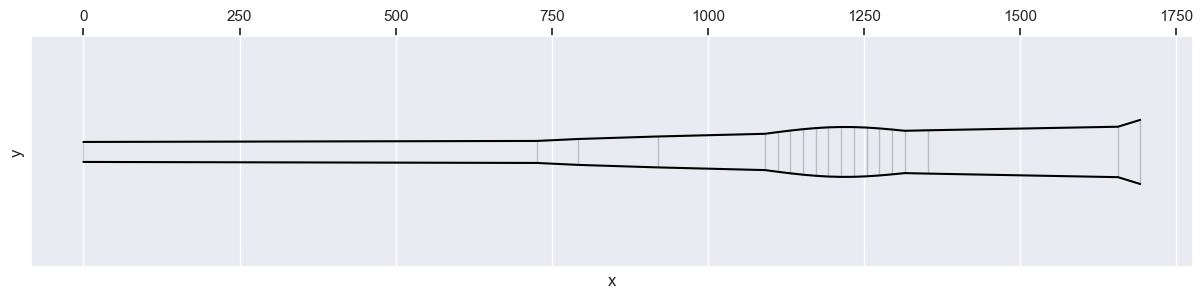

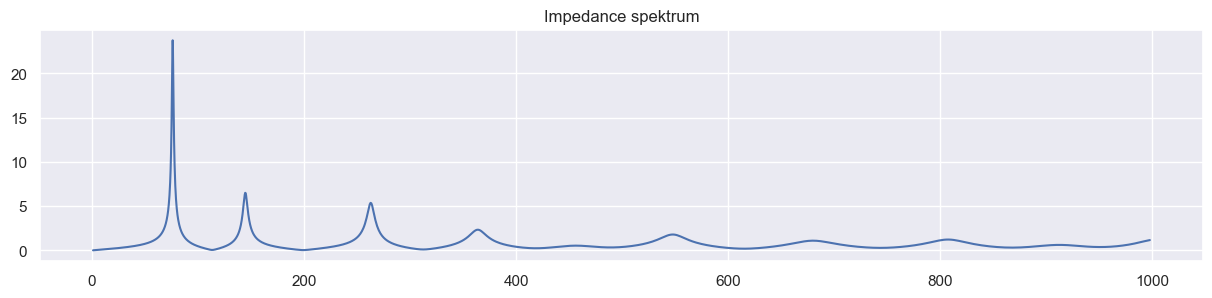

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1       0.53      -31   76.11      23.74     1.00
1       C#2      10.53      -20  144.51       6.50     0.27
2        B3      45.53      -10  262.74       5.37     0.23
3        F3      10.53       -4  364.14       2.34     0.10
4        A4       0.53        0  456.14       0.54     0.02
5        C4      15.53        3  547.17       1.79     0.08
6        E4      -9.47        7  679.50       1.10     0.05
7        G4      -9.47       10  808.07       1.23     0.05
8        A5       0.53       12  912.28       0.62     0.03
Impedance sum: 43.23
Volume: 91.97 cm3
Length: 169.23 cm
Bell diameter: 10.27 cm

************************
Individual 6
************************


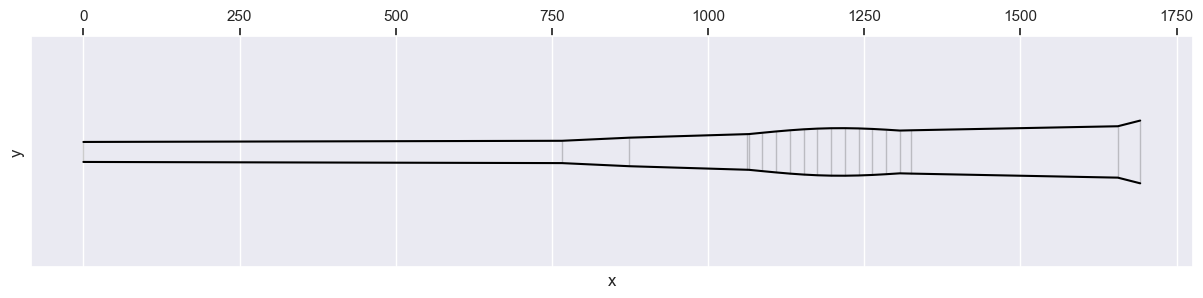

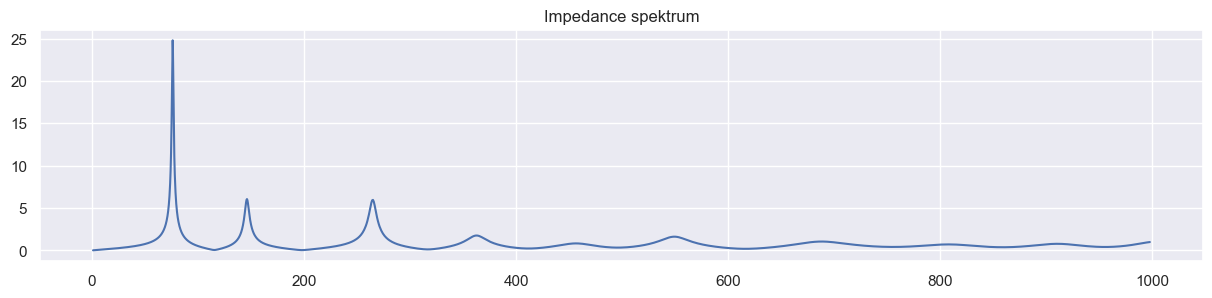

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1       0.53      -31   76.11      24.81     1.00
1       C#2      30.53      -20  146.19       6.06     0.24
2        C3     -39.47       -9  265.03       5.96     0.24
3        F3       5.53       -4  363.09       1.76     0.07
4        A4       0.53        0  456.14       0.83     0.03
5        C4      20.53        3  548.75       1.62     0.07
6        E4      10.53        7  687.40       1.05     0.04
7        G4      -9.47       10  808.07       0.71     0.03
8        A5      -4.47       12  909.65       0.78     0.03
Impedance sum: 43.57
Volume: 92.51 cm3
Length: 169.17 cm
Bell diameter: 10.05 cm

************************
Individual 7
************************


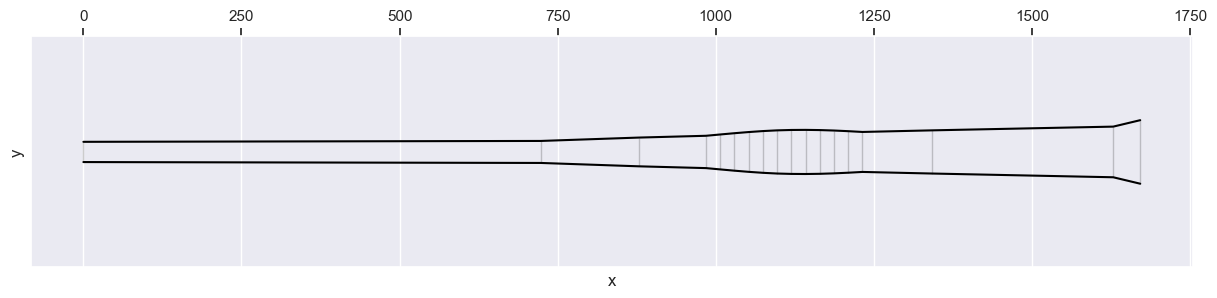

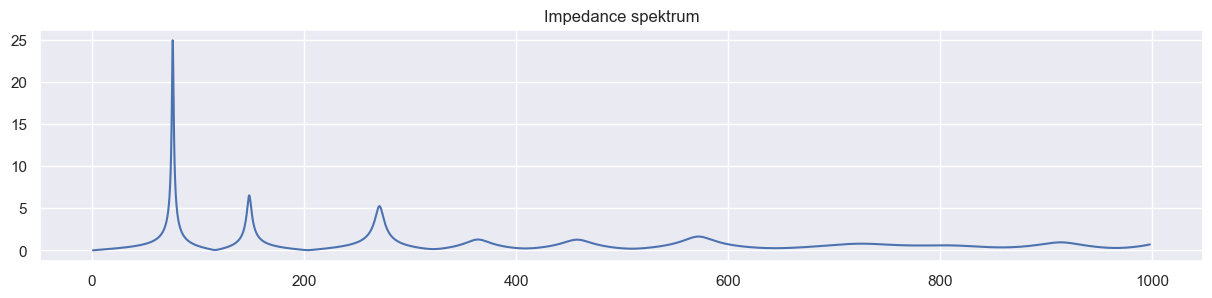

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1       0.53      -31   76.11      24.97     1.00
1        D2     -44.47      -19  148.31       6.55     0.26
2        C3       0.53       -9  271.22       5.27     0.21
3        F3      10.53       -4  364.14       1.30     0.05
4        A4       5.53        0  457.46       1.28     0.05
5       C#4      -9.47        4  571.39       1.64     0.07
6        F4       5.53        8  726.17       0.80     0.03
7        G4     -19.47       10  803.41       0.60     0.02
8        A5       0.53       12  912.28       0.96     0.04
Impedance sum: 43.37
Volume: 88.52 cm3
Length: 167.12 cm
Bell diameter: 10.05 cm

************************
Individual 8
************************


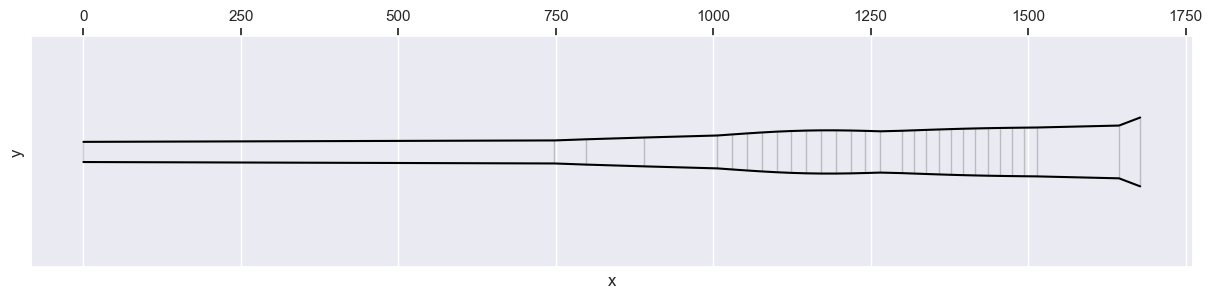

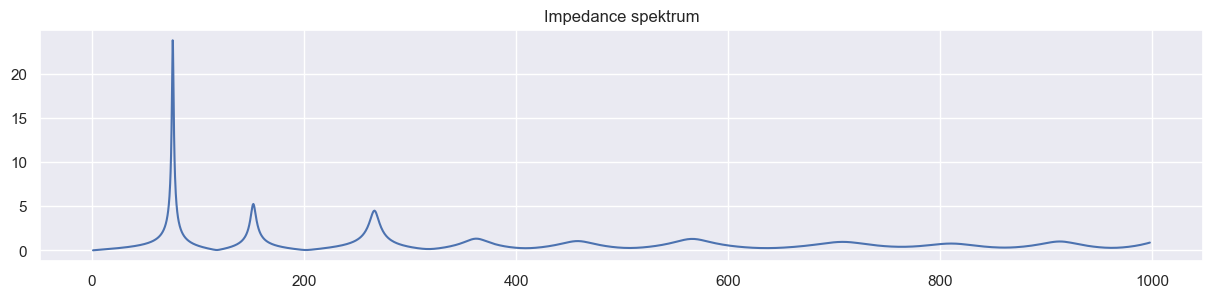

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1       0.53      -31   76.11      23.81     1.00
1        D2       0.53      -19  152.22       5.26     0.22
2        C3     -29.47       -9  266.56       4.50     0.19
3        F3       0.53       -4  362.04       1.33     0.06
4        A4       5.53        0  457.46       1.05     0.04
5       C#4     -24.47        4  566.46       1.30     0.05
6        F4     -39.47        8  707.54       0.96     0.04
7        G4      -4.47       10  810.41       0.78     0.03
8        A5       0.53       12  912.28       1.01     0.04
Impedance sum: 40.00
Volume: 89.20 cm3
Length: 167.78 cm
Bell diameter: 10.94 cm

************************
Individual 9
************************


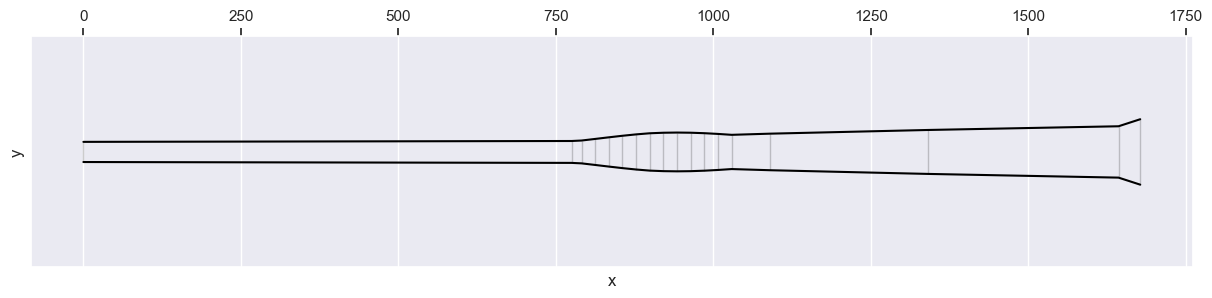

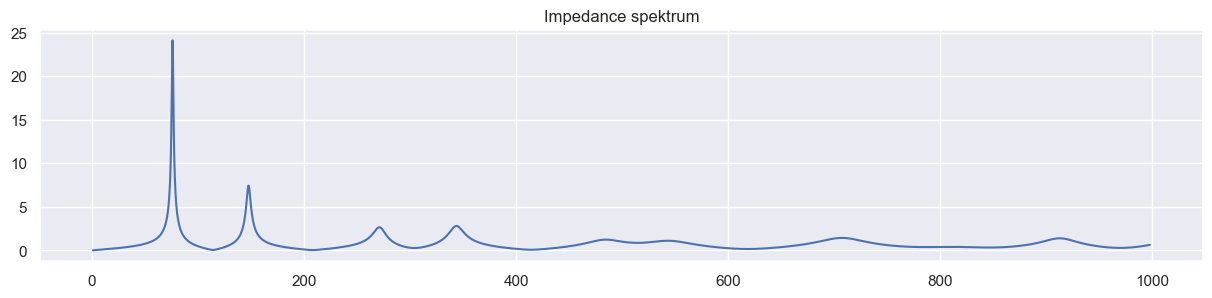

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1       0.53      -31   76.11      24.12     1.00
1       C#2      45.53      -20  147.46       7.44     0.31
2        C3       0.53       -9  271.22       2.66     0.11
3        E3      10.53       -5  343.70       2.81     0.12
4       A#4       5.53        1  484.66       1.24     0.05
5        C4       0.53        3  542.45       1.11     0.05
6        F4     -39.47        8  707.54       1.44     0.06
7        G4      -4.47       10  810.41       0.41     0.02
8        A5       0.53       12  912.28       1.39     0.06
Impedance sum: 42.61
Volume: 89.96 cm3
Length: 167.76 cm
Bell diameter: 10.39 cm



In [8]:
import matplotlib.pyplot as plt
base_freq=456
for i in range(10):
    geo = population[i]["representation"]["geo"]
    geo = Geo(geo)
    freqs = get_log_simulation_frequencies(1, 1000, 5)
    segments = create_segments(geo)
    impedance = compute_impedance(segments, freqs)
    notes = get_notes(freqs, impedance, base_freq=base_freq)
    print("************************")
    print(f"Individual {i}")
    print("************************")
    vis_didge(geo)
    plt.show()
    plt.plot(freqs, impedance)
    plt.title("Impedance spektrum")
    plt.show()
    print(notes.round(2))
    print(f"Impedance sum: {notes.impedance.sum():.2f}")
    print(f"Volume: {geo.compute_volume()/1000:.2f} cm3")
    print(f"Length: {geo.geo[-1][0]/10:.2f} cm")
    print(f"Bell diameter: {geo.geo[-1][1]/10:.2f} cm")
    print()


  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1       0.53      -31   76.11      30.90     1.00
1        D2       0.53      -19  152.22       3.36     0.11
2        C3      -4.47       -9  270.44       6.86     0.22
3        E3     -14.47       -5  338.77       0.30     0.01
4        A4     -34.47        0  447.01       6.25     0.20
5       C#4      45.53        4  589.83       2.40     0.08
6        E4     -39.47        7  667.83       0.56     0.02
7       F#4       5.53        9  769.35       1.69     0.05
8        A5       0.53       12  912.28       1.48     0.05
Impedance sum: 53.80
Volume: 83.72 cm3
Length: 164.50 cm
Bell diameter: 9.46 cm


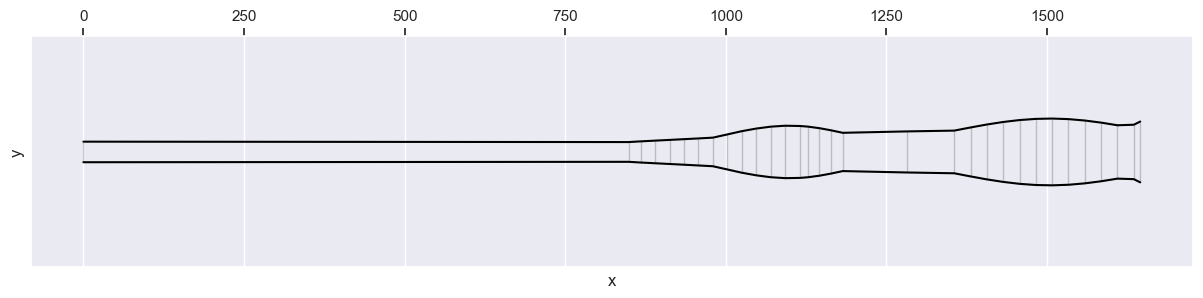

In [38]:
results, geo = eval_individual(population[1], base_freq=456)